In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# for display dataframe
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)


In [2]:
import matplotlib.ticker as ticker
import matplotlib.scale as mscale
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker

class SquareRootScale(mscale.ScaleBase):
    """
    ScaleBase class for generating square root scale.
    """

    name = 'squareroot'

    def __init__(self, axis, **kwargs):
        mscale.ScaleBase.__init__(self)

    def set_default_locators_and_formatters(self, axis):
        axis.set_major_locator(ticker.AutoLocator())
        axis.set_major_formatter(ticker.ScalarFormatter())
        axis.set_minor_locator(ticker.NullLocator())
        axis.set_minor_formatter(ticker.NullFormatter())

    def limit_range_for_scale(self, vmin, vmax, minpos):
        return  max(0., vmin), vmax

    class SquareRootTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True

        def transform_non_affine(self, a): 
            return np.array(a)**0.5

        def inverted(self):
            return SquareRootScale.InvertedSquareRootTransform()

    class InvertedSquareRootTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True

        def transform(self, a):
            return np.array(a)**2

        def inverted(self):
            return SquareRootScale.SquareRootTransform()

    def get_transform(self):
        return self.SquareRootTransform()

mscale.register_scale(SquareRootScale)

In [4]:
df_train = pd.read_csv('user_label_201703.gzip',compression='gzip')
df_member = pd.read_csv('members_v3.gzip',compression='gzip')
df_train = pd.merge(df_train, df_member,how='left',on='msno')
df_train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,0,1.0,0.0,NaN,7.0,20140714.0
1,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,0,NaN,NaN,NaN,NaN,NaN
2,+/g9O3USecrC8npzaFHXW/2XJ7fB80SineiUoCg7M6o=,0,NaN,NaN,NaN,NaN,NaN
3,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,0,15.0,31.0,male,9.0,20060603.0
4,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,0,9.0,31.0,male,9.0,20040330.0


In [5]:
print("missing_vaules\n",np.around(df_train.isnull().sum() / len(df_train),decimals=3))
# missing together expcept gender(sex)

missing_vaules
 msno                      0.000
is_churn                  0.000
city                      0.123
bd                        0.123
gender                    0.642
registered_via            0.123
registration_init_time    0.123
dtype: float64


In [7]:
# parse_date
test = pd.read_csv('members_v3.gzip',compression='gzip',parse_dates=['registration_init_time'])
test.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09-15


In [8]:
test.registration_init_time.isnull().any()

False

* CANNOT detect missing values, avoid to use it

In [9]:
# float64 to datetime 
df = df_train[df_train.registration_init_time.notnull()]
df.registration_init_time.dtype

dtype('float64')

# pd.to_dateime

In [13]:
df['Reg_INT'] = pd.to_datetime(df.registration_init_time,format='%Y%m%d.0')
df.Reg_INT.isnull().any()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


False

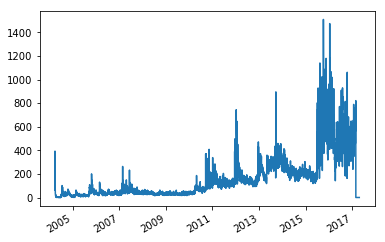

In [14]:
# numerical bar --> line
df.Reg_INT.value_counts().sort_values().plot(kind='line')

# Resampling

In [16]:
# pd.DataFrame.resample

In [17]:
# pd.DataFrame.asfreq

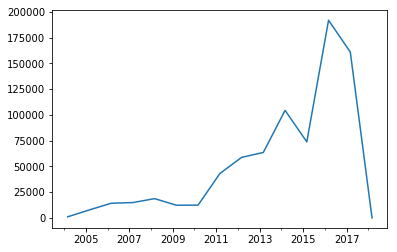

In [18]:
# resmaple return a groupby object, need aggregation function
df.Reg_INT.value_counts().resample('12M').sum().plot(kind='line')

In [19]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 '_classic_test']

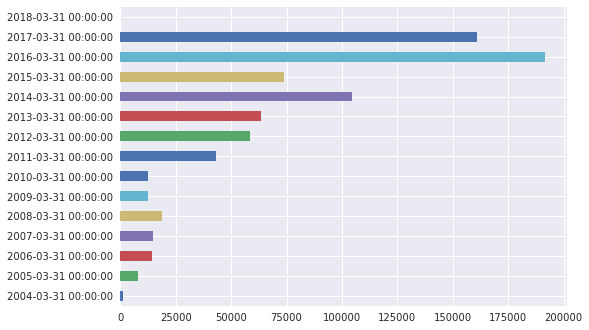

In [20]:
with plt.style.context('seaborn'):
    df.Reg_INT.value_counts().resample('12M').sum().plot(kind='barh')

# Groupby with DatatimeIndex

In [21]:
# so far we can do
df.groupby(by=['Reg_INT'],as_index=False)['is_churn'].mean().head()
# how to groupby with week, month, year ? 

,Reg_INT,is_churn
0,2004-03-26,0.015625
1,2004-03-27,0.035533
2,2004-03-28,0.041199
3,2004-03-29,0.032787
4,2004-03-30,0.072917


In [22]:
import datetime

In [23]:
df['Reg_INT_tt'] = df['Reg_INT'].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
print(df['Reg_INT'].dtype, df['Reg_INT_tt'].dtype)

datetime64[ns] datetime64[ns]


In [25]:
df.set_index(df['Reg_INT_tt'],inplace=True)
df.index
# now we have DatetimeIndex

DatetimeIndex(['2014-07-14', '2006-06-03', '2004-03-30', '2008-03-22',
               '2015-03-16', '2013-02-27', '2008-04-17', '2015-11-03',
               '2012-12-17', '2009-08-25',
               ...
               '2014-08-09', '2011-12-04', '2015-09-17', '2015-11-08',
               '2016-01-04', '2013-11-12', '2013-12-09', '2011-01-19',
               '2015-06-02', '2016-12-12'],
              dtype='datetime64[ns]', name='Reg_INT_tt', length=777751, freq=None)

In [26]:
df.drop(labels='Reg_INT_tt',axis=1).head()
# you can see we have DatetimeIndex now

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,Reg_INT
Reg_INT_tt,,,,,,,,
2014-07-14,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,0,1.0,0.0,NaN,7.0,20140714.0,2014-07-14
2006-06-03,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,0,15.0,31.0,male,9.0,20060603.0,2006-06-03
2004-03-30,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,0,9.0,31.0,male,9.0,20040330.0,2004-03-30
2008-03-22,+09YGn842g6h2EZUXe0VWeC4bBoCbDGfUboitc0vIHw=,0,15.0,29.0,male,9.0,20080322.0,2008-03-22
2015-03-16,+0l+FDuhyjaZnu0APnrg5L9QqgaRw4RmdQMvqOtKDmU=,0,13.0,32.0,male,3.0,20150316.0,2015-03-16


In [27]:
display(df.drop(labels='Reg_INT_tt',axis=1)['is_churn'].head())
df1 = df.drop(labels='Reg_INT_tt',axis=1)[['is_churn']]

Reg_INT_tt
2014-07-14    0
2006-06-03    0
2004-03-30    0
2008-03-22    0
2015-03-16    0
Name: is_churn, dtype: int64

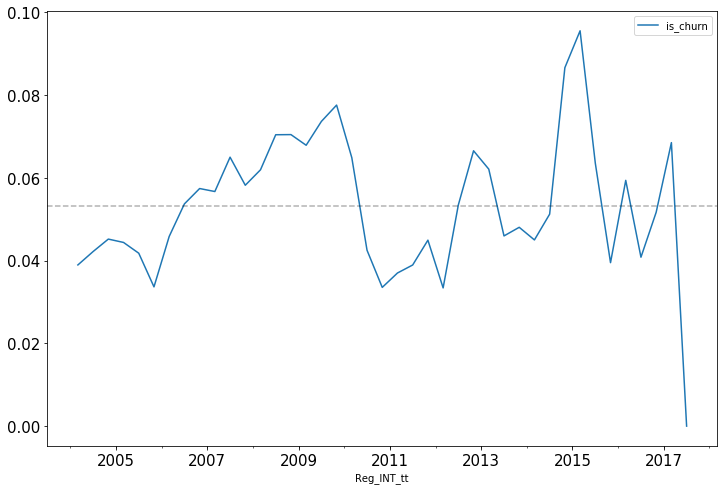

In [28]:
ax = df1.resample('4M').mean().plot(kind='line',figsize=(12,8),fontsize=15)
ax.axhline(df1.is_churn.mean(),linestyle='dashed',c='black',alpha=.3)

> We did it, need datetime to make datetime64[ns] dtype as DatetimeIndex, then resample first
> We can change resample size if we want, and plot with it freely

## Plot churn_rate & reg_init_counts

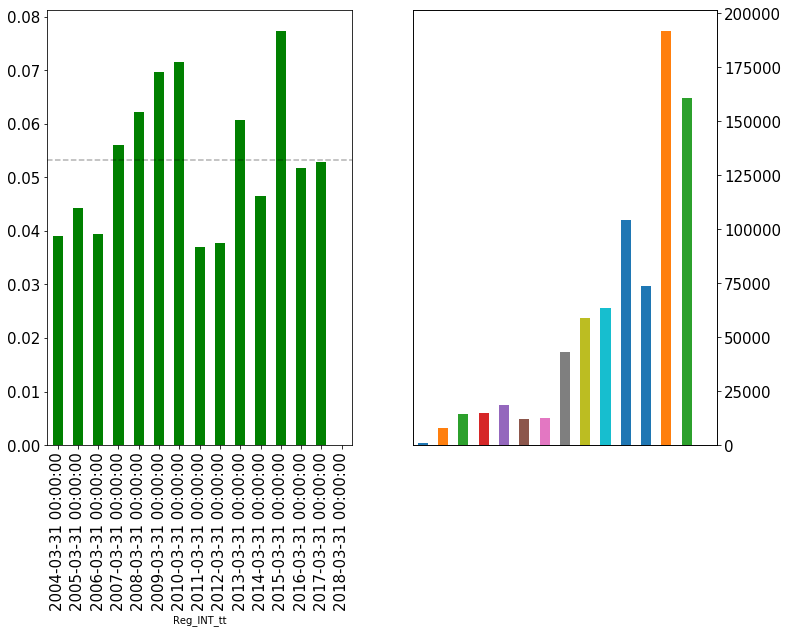

In [29]:
df1 = df.drop(labels='Reg_INT_tt',axis=1)[['is_churn', 'Reg_INT']]
fig,[ax1,ax2] = plt.subplots( 1, 2, figsize=(20,12))
df1.resample('12M')['is_churn'].mean().plot(kind='bar',figsize=(12,8),fontsize=15,color='g',ax=ax1)
df1['Reg_INT'].value_counts().resample('12M').sum().plot(kind='bar',secondary_y=True,fontsize=15)
ax1.axhline(df1.is_churn.mean(),linestyle='dashed',c='black',alpha=.3)
# x_axis = ax1.axes.get_xaxis()
# x_axis.set_visible(False)
x_axis = ax2.axes.get_xaxis()
x_axis.set_visible(False)

In [31]:
df1 = df.drop(labels='Reg_INT_tt',axis=1)[['is_churn', 'registered_via','Reg_INT']]
# d1.index.year / index.month / index.week / index.day work with pd_crosstab
pd.crosstab(index=df1.index.year,columns=df1.registered_via)

registered_via,3.0,4.0,7.0,9.0,13.0
row_0,,,,,
2004,0,0,0,6774,0
2005,0,0,0,12309,0
2006,0,0,0,14067,0
2007,0,0,0,19663,0
2008,0,0,1,13164,0
2009,0,0,62,11836,0
2010,0,0,17762,13817,0
2011,762,0,32404,18817,0
2012,16139,0,35316,12156,0


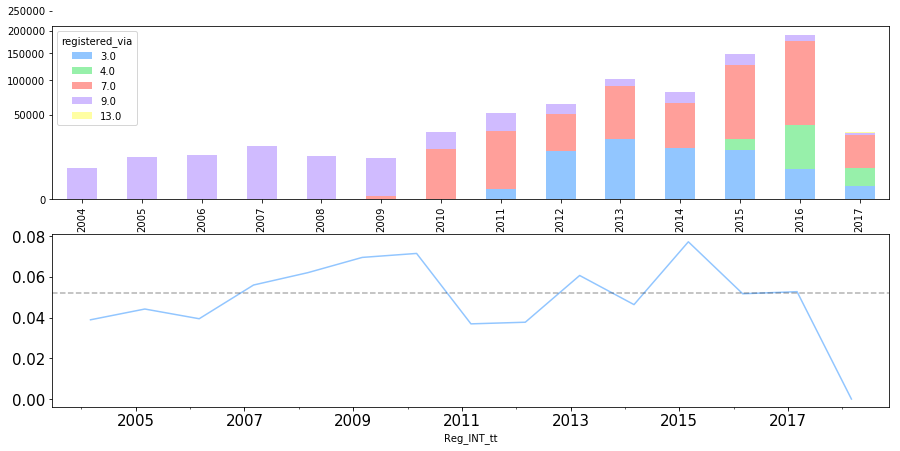

In [32]:
# plot together when display!
with plt.style.context('seaborn-pastel'):
    # plt.figure()
    fig, [ax1,ax2] = plt.subplots(2,1, figsize=(15,7))
    pd.crosstab(index=df1.index.year,columns=df1.registered_via).plot(kind='bar',stacked=True,ax=ax1)
    df1.resample('12M')['is_churn'].mean().plot(kind='line',fontsize=15,ax=ax2)
    ax1.set_yscale('squareroot')
    ax2.axhline(0.052,linestyle='dashed',c='black',alpha=.3)

# Lag plot

In [36]:
from pandas.plotting import lag_plot

# Autocorrelation plot

In [37]:
from pandas.plotting import autocorrelation_plot

# Time_index operation

In [38]:
import datetime as dt

In [39]:
dt.date(2017,4,20) > dt.date(2017,4,1)

True